Estamos tentando resolver o sistema de equações abaixo:
\begin{equation}
\left\{\begin{matrix}
&\frac{\partial h}{\partial \eta} = -ibh,
\\
&\frac{\partial^2 p}{\partial \xi^2} + \frac{(2m+1)}{\xi}\frac{\partial p}{\partial \xi} + \xi^{2m}|p|^2p + bp = 0 \end{matrix}\right.
\end{equation}

A primeira equação possui uma solução analítica:

$$h(\eta) = h(0)e^{-ib\eta}$$

A segunda resolvemos numericamente nos limitando para o caso onde $p \in \mathbb{R}$, isto é
\begin{equation}
\frac{\partial^2 p}{\partial \xi^2} + \frac{\partial p}{\partial \xi} = -\frac{\xi^{2m+1}}{2m+1}p^3 - \frac{\xi }{2m+1}bp
\end{equation}

Para solucionar a equação acima utilizando a biblioteca do python scipy, transformamos a equação acima em um sistema de equações diferenciais ordinarias de primeira ordem:

\begin{equation}
\left\{\begin{matrix}
& \theta = \frac{\partial p}{\partial \xi},
\\
&\frac{\partial \theta}{\partial \xi} = -\frac{(2m+1)}{\xi}\theta - \xi^{2m}p^3 - bp \end{matrix}\right.
\end{equation}

#### Condições iniciais:
\begin{gather}
p(0) = 1, \\
\frac{\partial p}{\partial \xi}(0) \equiv \theta(0) = 0.
\end{gather}

### Importanto bibliotecas:

#### Sobre scipy.integrate.odeint:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint

In [66]:
import numpy as np  # biblioteca para computação científica em geral
import matplotlib.pyplot as plt  # biblioteca para geração de plos
%matplotlib inline
plt.rc('figure', figsize = (14,6))

from scipy.integrate import odeint
# odeint é uma função definida dentro do pacote scipy para resolução de EDO's

### Definindo o modelo para a EDO a ser resolvida numericamente

In [67]:
def model_p(y, xi, b, m):
    p, theta = y
    
    dydxi = [theta,
             - ( (2 * m + 1) / xi ) * theta - (xi ** (2 * m) ) * p ** (3) - (b * p)]
    return dydxi

## Plot de Alguns cenários

## b = 0, m = 0

Text(0.5, 1.0, 'Solução numérica para a equação diferencial')

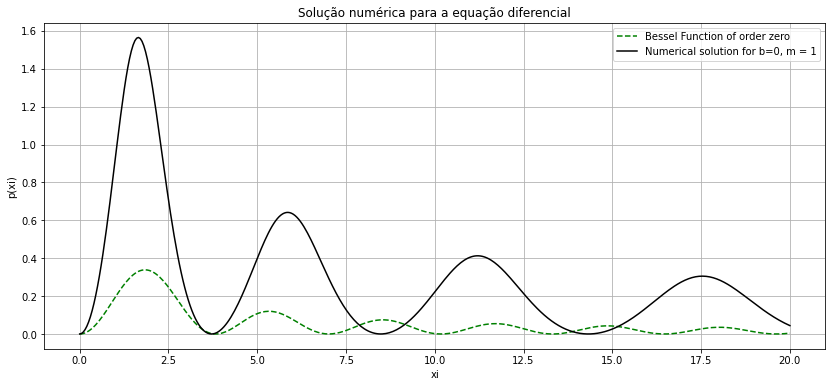

In [135]:
y0 = [1, 0]  # initial condition

# Argumentos
b = 0
m = 1


xi_span = np.linspace(.001, 20, 400)  # espaço discretizado da coordenada xi
solucao = odeint(model_p, y0, xi_span, args=(b,m))


#for b in range
from scipy.special import jv # Bessel function first kin, order v


plt.figure(figsize=(14,6))
plt.plot(xi_span, abs(jv(1, xi_span)) ** 2, 'g', label='Bessel Function of order zero', linestyle='--')
plt.plot(xi_span, abs(xi_span**m  * solucao[:,0]) ** 2, 'k', label=f'Numerical solution for b={b}, m = {m}')
plt.xlabel('xi')
plt.ylabel('p(xi)')
plt.legend(loc='best')
plt.grid()
plt.title(r'Solução numérica para a equação diferencial')

## b = 1; m = 0, 1

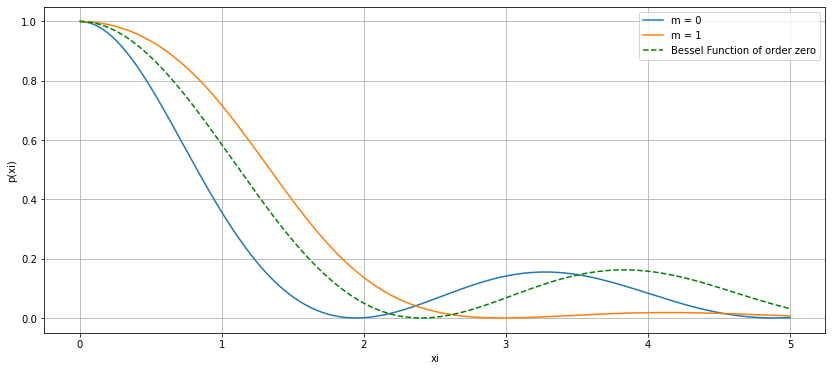

In [70]:
y0 = [1, 0]  # initial condition

# Argumentos
b = 1


xi_span = np.linspace(.001, 5, 200)  # espaço discretizado da coordenada xi
solucao = odeint(model_p, y0, xi_span, args=(b,m))

#for b in range
from scipy.special import jv # Bessel function first kin, order v


for ic in range(2):
    sol = odeint(model_p, y0, xi_span,  args=(b,ic))
    plt.plot(xi_span, abs(sol[:, 0]) ** 2, label=f'm = {ic}')
    #
    
plt.plot(xi_span, abs(jv(0, xi_span)) ** 2, 'g', label='Bessel Function of order zero', linestyle='--')
plt.xlabel('xi')
plt.ylabel('p(xi)')
plt.legend(loc = 'best')
plt.grid()

## b = -1, m = 0, 1

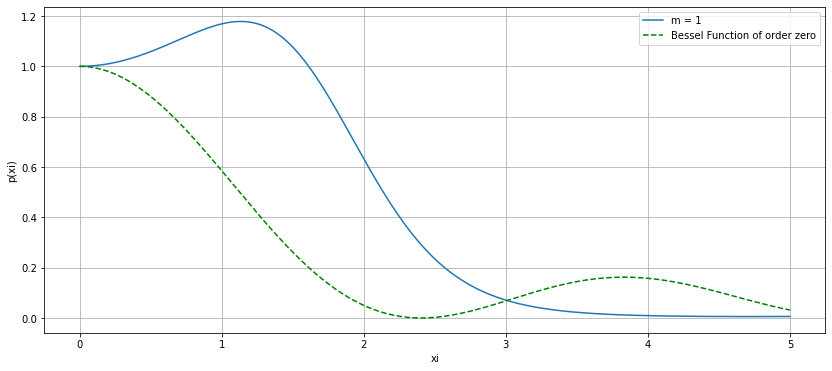

In [71]:
y0 = [1, 0]  # initial condition

# Argumentos
b = -1

xi_span = np.linspace(.001, 5, 200)  # espaço discretizado da coordenada xi
solucao = odeint(model_p, y0, xi_span, args=(b,m))

#for b in range
from scipy.special import jv # Bessel function first kin, order v


for ic in range(1,2):
    sol = odeint(model_p, y0, xi_span,  args=(b,ic))
    plt.plot(xi_span, abs(sol[:, 0]) ** 2, label=f'm = {ic}')
    #
    
plt.plot(xi_span, abs(jv(0, xi_span)) ** 2, 'g', label='Bessel Function of order zero', linestyle='--')
plt.xlabel('xi')
plt.ylabel('p(xi)')
plt.legend(loc = 'best')
plt.grid()

## b = -30, m = 1, 2

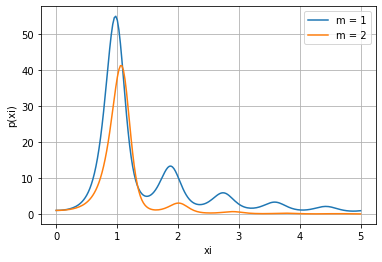

In [99]:
y0 = [1, 0]  # initial condition

# Argumentos
b = -30


xi_span = np.linspace(.001, 5, 200)  # espaço discretizado da coordenada xi
solucao = odeint(model_p, y0, xi_span, args=(b,m))

#for b in range
from scipy.special import jv # Bessel function first kin, order v


for ic in range(1,3):
    sol = odeint(model_p, y0, xi_span,  args=(b,ic))
    plt.plot(xi_span, abs(sol[:, 0]) ** 2, label=f'm = {ic}')
    #print(ic)
    #
    
# plt.plot(xi_span, abs(jv(1, xi_span)) ** 2, 'g', label='Bessel Function of order zero', linestyle='--')
plt.xlabel('xi')
plt.ylabel('p(xi)')
plt.legend(loc = 'best')
plt.grid()

# m < 0 ( simplesmente quebra )

/home/andsantos/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


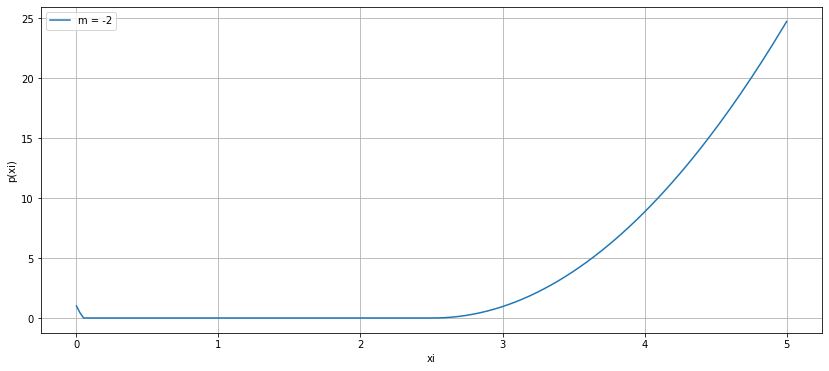

In [73]:
y0 = [1, 0]  # initial condition

# Argumentos
b = 0

xi_span = np.linspace(.001, 5, 200)  # espaço discretizado da coordenada xi
solucao = odeint(model_p, y0, xi_span, args=(b,m))

#for b in range
from scipy.special import jv # Bessel function first kin, order v


ic = 2
sol = odeint(model_p, y0, xi_span,  args=(b,-ic))
plt.plot(xi_span, abs(sol[:, 0]) ** 2, label=f'm = {-ic}')
    #
    
# plt.plot(xi_span, abs(jv(1, xi_span)) ** 2, 'g', label='Bessel Function of order zero', linestyle='--')
plt.xlabel('xi')
plt.ylabel('p(xi)')
plt.legend(loc = 'best')
plt.grid()

# Formulação Alternativa

Estamos tentando resolver o sistema de equações abaixo:
\begin{equation}
\left\{\begin{matrix}
&\frac{d h}{d \eta} = -ibh,
\\
&\frac{d^2 p}{d \xi^2} + \frac{1}{\xi}\frac{d p}{d\xi}  -\frac{m^2}{\xi^2}p= -p^3 -bp  
\end{matrix}\right.
\end{equation}

Obs: resolve o problema para $m <0$.

Text(0.5, 1.0, 'Solução numérica para a equação diferencial')

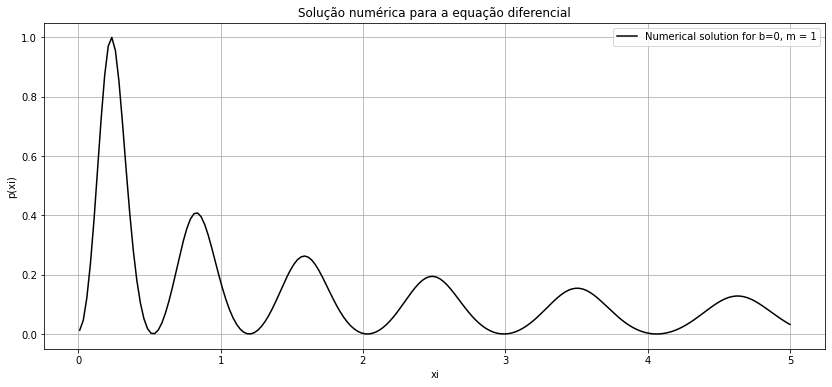

In [82]:
def model_p2(y, xi_space, b, m):
    p, theta = y
    
    
        
    dydxi = [theta, - (1 /xi_space)*theta + ((m/xi_space)**2) * p - p**3 - (b * p)]
    return dydxi



y0 = [1, 0]  # initial condition
xi_space = np.linspace(0.01,5, 200)

# Argumentos
b = 0
m = -1

solucao = odeint(model_p2, y0, xi_space, args=(b,m))

# Plotting

plt.figure(figsize = (14,6))
plt.plot(xi_space, abs(solucao[:,0]/solucao[:,0].max()) ** 2, 'k', label=f'Numerical solution for b={b}, m = 1')
plt.xlabel('xi')
plt.ylabel('p(xi)')
plt.legend(loc='best')
plt.grid()
plt.title(r'Solução numérica para a equação diferencial')

# Solucionando numericamente as equações do artigo

## Solução da equação (2.11a)

### OBS: Como estamos preocupado com o padrão transverso e como a equação diferencial para a fase é dependente da função M, resolver a equação diferencial para M é equivalente a resolver o problema por completo.

#### Modificando a equação para inserir na função odeint

\begin{gather}
M_{\rho\rho} + \frac{1}{\rho}M_{\rho} - \frac{a^2}{\rho^2}M = -bM + a_1M^3 \\
\end{gather}
Fazendo $M_{\rho} = \theta$, obtemos o sistema de equações abaixo:

\begin{equation}
\left\{\begin{matrix}
&M_{\rho} = \theta,
\\
& \theta_{\rho} = -\frac{1}{\rho}\theta + \frac{a^2}{\rho^2}M + a_1M^3 -bM\end{matrix}\right.
\end{equation}

onde repitimos as condições iniciais anterior, isto é
\begin{gather}
M_{\rho}(0) \equiv \theta(0) = 0, \\
M(0) = 1 \\
a_1 = -1
\end{gather}

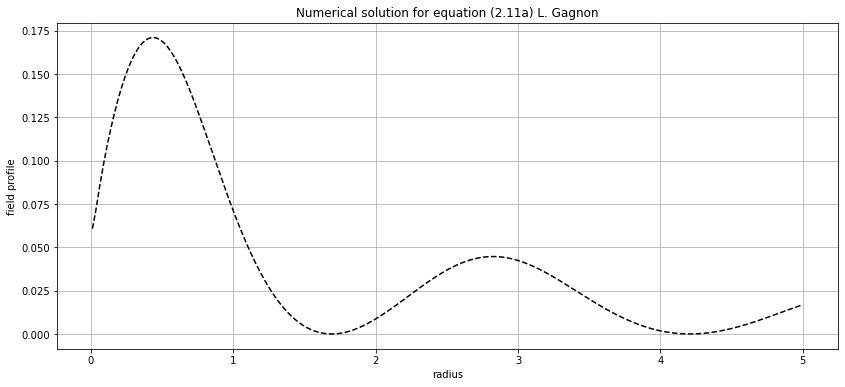

In [77]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))
%matplotlib inline

from scipy.integrate import odeint
from scipy.special import jv  # Spherical Bessel function


def model_M(y, rho_space, b, a):
    """
    a: oam
    S : parameter (in the article, S = 0)
    b = parameter (in the article, b = 0)
    """
    M, theta = y
    
    dydrho = [theta, - (1 / rho_space) * theta + ((a/rho_space) ** 2) * M  - M ** 3 - (b * M)]
    
    return dydrho


# Initial condition and discretized space
y0 = [1, 0]
rho_space = np.linspace(0.01, 5, 200)

# Arguments
b = 1
a = -1/3

# Solving

solution = odeint(model_M, y0, rho_space, args=(b, a))

# Plotting


plt.figure(figsize = (14,6))
plt.plot(rho_space, abs(solution[:,0]/solution.max()) ** 2, '--', color='k');
plt.title('Numerical solution for equation (2.11a) L. Gagnon')
plt.xlabel('radius')
plt.ylabel('field profile')
#plt.plot(rho_space, abs(jv(1, rho_space)) ** 2, '--') ;
plt.grid()

## Solução da equação (2.15a)

### Sistema de equações

\begin{equation}
\left\{\begin{matrix}
&M_{\xi} = \theta,
\\
& \theta_{\xi} = -\frac{\theta}{\xi} -\left(\frac{b}{4\xi} -\frac{1}{16} - \frac{a^2}{4\xi^2}\right)M -M^3 -bM\end{matrix}\right.
\end{equation}

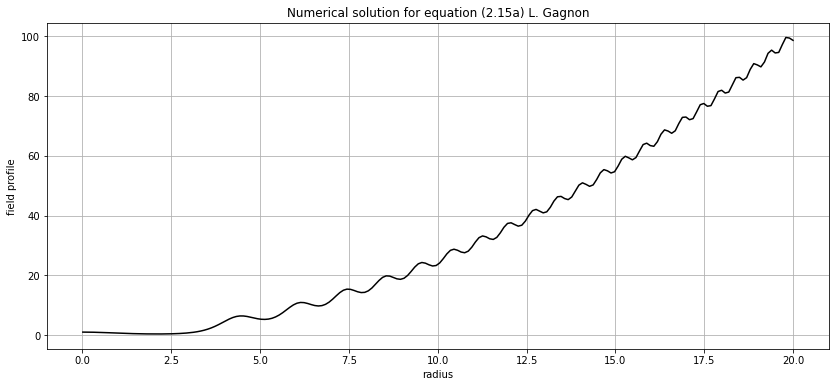

In [80]:
def model_M2(y, xi_space, b, a):
    """
    a: oam
    S : parameter (in the article, S = 0)
    b = parameter (in the article, b = 0)
    """
    M, theta = y
    
    dydxi = [theta,
             - (theta / xi_space) -( b/(4 * xi_space) -1/16 - (a/ 2 * xi_space) ** 2) * M  - M ** 3  -(b * M)]
    
    return dydxi

# Initial condition and discretized space
y0 = [1, 0]
xi_space = np.linspace(0.01, 20, 200)

# Arguments
b = 0
a = 1

# Solving

solution2 = odeint(model_M2, y0, xi_space, args=(b, a))

# Plotting

plt.figure(figsize = (14,6))
plt.plot(xi_space, abs(solution2[:,0]) ** 2, color='k');
plt.title('Numerical solution for equation (2.15a) L. Gagnon')
plt.xlabel('radius')
plt.ylabel('field profile')
#plt.plot(rho_space, abs(jv(1, rho_space)) ** 2, '--') ;
plt.grid()

## Extra ( Teste caso onde p é complexo )

/home/andsantos/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Text(0.5, 1.0, 'Solução numérica para a equação diferencial')

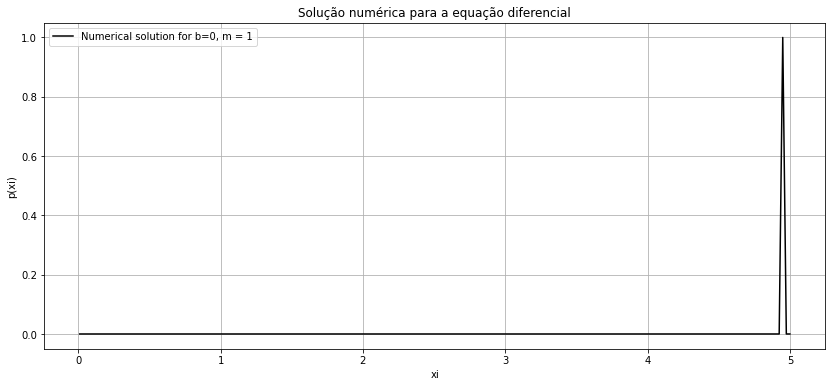

In [105]:
def model_p3(y, xi_space, b, m):
    p, qsi, theta, omega = y
    
    
        
    dydxi = [theta,
             omega,
             p * omega**2 -(2*m+1)/xi_space * omega + xi_space**2 * p**3 - b * p,
             -(2*m + 1)/xi_space * omega - 2 * omega * theta / p]
    
    return dydxi



y0 = [1, 0, 0, 0]  # initial condition
xi_space = np.linspace(0.01,5, 200)

# Argumentos
b = 0
m = 1

solucao = odeint(model_p3, y0, xi_space, args=(b,m))

# Plotting

plt.figure(figsize = (14,6))
plt.plot(xi_space, abs(solucao[:,0]/solucao[:,0].max()) ** 2, 'k', label=f'Numerical solution for b={b}, m = 1')
plt.xlabel('xi')
plt.ylabel('p(xi)')
plt.legend(loc='best')
plt.grid()
plt.title(r'Solução numérica para a equação diferencial')